In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
from twitter.twitter_collection import TwitterCollection
from twitter.tweet_sentiment_analyzer import TweetSentimentAnalyzer
from data_pipelines.data_manipulation import DataManipulation
from dl_models.xgboost_forecaster import XgboostForecaster
from logger.logger import Logger


import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

In [2]:
SYMBOL = 'BTC-USD'
SYMBOL_NAME = 'Bitcoin'
SYMBOL_CUT = 'btc'
scale = 1
range_list = [i for i in range(5,21)]
range_list = [i*scale for i in range_list]
interval = '1h'
start_date = '2020-06-30'
end_date = '2022-07-01'
source = 'yahoo'
LOG_PATH = '../logger' + os.sep + "logs"
LOG_FILE_NAME_PREFIX = f"log_{SYMBOL_CUT}_{start_date}_{end_date}"

logger = Logger(LOG_PATH, LOG_FILE_NAME_PREFIX)
tsa = TweetSentimentAnalyzer()
data = DataManipulation(SYMBOL, source, range_list, start_date=start_date, 
                        end_date=end_date, interval=interval, scale=scale, 
                        prefix_path='..', saved_to_csv=True,
                        logger=logger)
df_price = data.df.copy()

1 ) 24-12-2022 23_30_27 MainThread INFO\ Initialized logging at path ../logger/logs/log_btc_2020-06-30_2022-07-01_24-12-2022_23_30_27.log
2 ) 24-12-2022 23_30_27 MainThread DEBUG\ pure file exist
3 ) 24-12-2022 23_30_27 MainThread DEBUG\ Write pure data file to ../data/pure_data/BTC-USDBTC-USD_2020-06-30_2022-07-01_1h.csv
Start TA-LIB module
4 ) 24-12-2022 23_30_27 MainThread DEBUG\ Calculated SMA for range [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
5 ) 24-12-2022 23_30_27 MainThread DEBUG\ Calculated BOLLINGERBAND for range [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
6 ) 24-12-2022 23_30_27 MainThread DEBUG\ Calculated DEMA for range [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
7 ) 24-12-2022 23_30_27 MainThread DEBUG\ Calculated EMA for range [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
8 ) 24-12-2022 23_30_27 MainThread DEBUG\ Calculated KAMA for range [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
9 ) 24-12

In [3]:
df_price_ext = data.extract_features()
close_col = df_price.loc['2021-01-01':'2022-06-27',['close','volume']].copy()

30 ) 24-12-2022 23_31_26 MainThread DEBUG\ Start helper function for Hisse strategy
31 ) 24-12-2022 23_31_26 MainThread DEBUG\ Hisse strategy, mfi and fischer scoring is finished
32 ) 24-12-2022 23_31_26 MainThread DEBUG\ Start ema normalized label


100%|██████████| 16/16 [00:00<00:00, 479.95it/s]


33 ) 24-12-2022 23_31_26 MainThread DEBUG\ Add ema normalized label
34 ) 24-12-2022 23_31_26 MainThread DEBUG\ Start mfi normalized label


100%|██████████| 16/16 [00:00<00:00, 1098.38it/s]


35 ) 24-12-2022 23_31_26 MainThread DEBUG\ Add mfi normalized label
36 ) 24-12-2022 23_31_26 MainThread DEBUG\ Start sma normalized label


100%|██████████| 16/16 [00:00<00:00, 534.54it/s]


37 ) 24-12-2022 23_31_26 MainThread DEBUG\ Add sma normalized label
38 ) 24-12-2022 23_31_26 MainThread DEBUG\ Start wma normalized label


100%|██████████| 16/16 [00:00<00:00, 576.53it/s]


39 ) 24-12-2022 23_31_26 MainThread DEBUG\ Add wma normalized label
40 ) 24-12-2022 23_31_26 MainThread DEBUG\ Start tema normalized label


100%|██████████| 16/16 [00:00<00:00, 42.52it/s]


41 ) 24-12-2022 23_31_27 MainThread DEBUG\ Add tema normalized label
42 ) 24-12-2022 23_31_27 MainThread DEBUG\ Start kama normalized label


100%|██████████| 16/16 [00:00<00:00, 36.60it/s]


43 ) 24-12-2022 23_31_27 MainThread DEBUG\ Add kama normalized label
44 ) 24-12-2022 23_31_27 MainThread DEBUG\ Start rsi normalized label


100%|██████████| 16/16 [00:00<00:00, 56.40it/s]


45 ) 24-12-2022 23_31_27 MainThread DEBUG\ Add rsi normalized label
46 ) 24-12-2022 23_31_28 MainThread DEBUG\ Add ADX indicator normalized label
47 ) 24-12-2022 23_31_28 MainThread DEBUG\ Normalized features for indicators values to 1 and 0
48 ) 24-12-2022 23_31_28 MainThread DEBUG\ Add Datetime fetures for extracted feature data
49 ) 24-12-2022 23_31_29 MainThread DEBUG\ Lags for features and log return vol_delta with binary label
50 ) 24-12-2022 23_31_29 MainThread DEBUG\ Add KZ score and Index label
logs written...


In [4]:
sent_tweets = pd.read_csv('btc_archieve/btc_hourly_sent_score.csv')
sent_tweets.Date = pd.to_datetime(sent_tweets.Date)
sent_tweets.set_index('Date', inplace=True, drop=True)

In [5]:
sent_tweets.index = sent_tweets.index.tz_convert(None)

In [6]:
df_final = tsa.concat_ohlc_compound_score(df_price_ext, sent_tweets)
df_final = df_final.loc['2021-01-01':,:].copy()
df_final.dropna(inplace=True)

Concantenation for sentiment score tweets and indicator MAtrix data


In [7]:
df_final.shape

(13043, 262)

Text(0.5, 1.0, 'Bitcoin Proce')

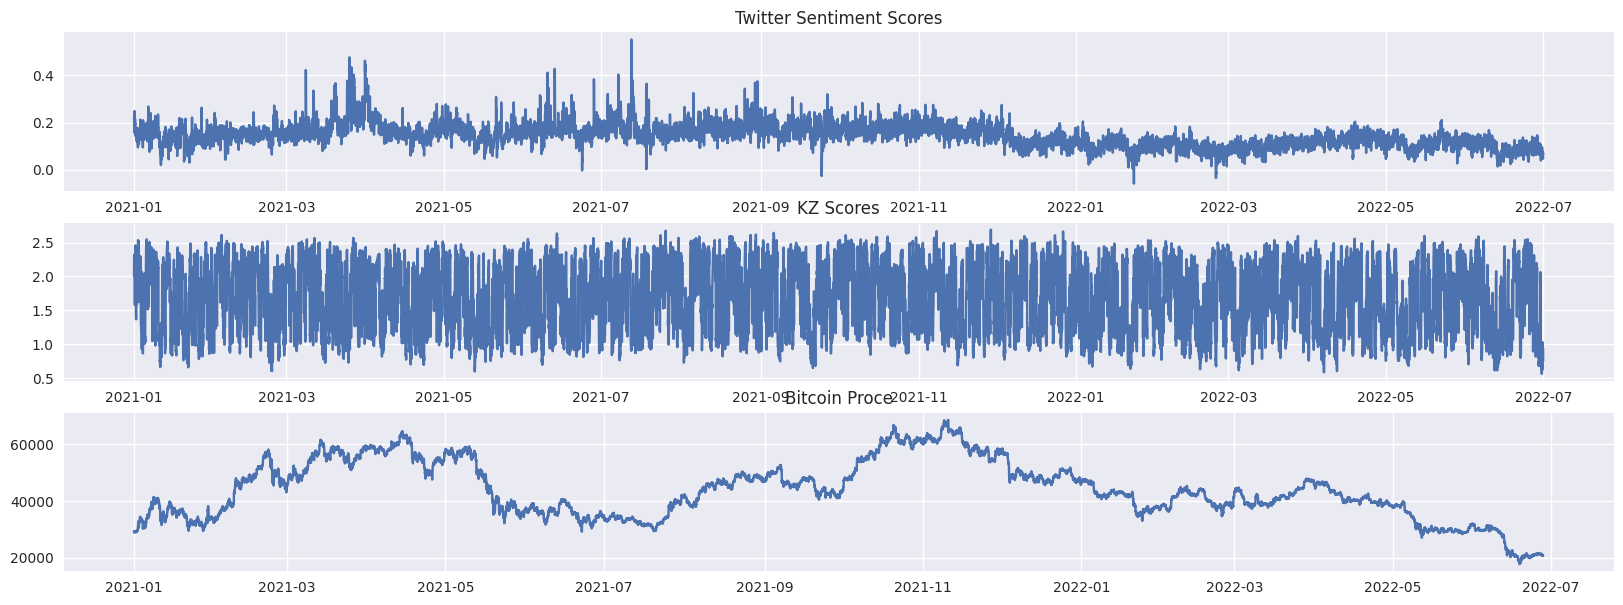

In [8]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(20,7))
ax1.plot(df_final.compound_total)
ax1.set_title('Twitter Sentiment Scores')
ax2.plot(df_final.index, df_final.kz_score)
ax2.set_title('KZ Scores')
ax3.plot(close_col.index, close_col.close)
ax3.set_title('Bitcoin Proce')

In [9]:
df = df_final.copy()
df.reset_index(drop=True, inplace=True)
df.head()

,st_stoch,st_ich,st_cut_ema5_sma10,st_macd,st_ich_close,st_dmi,st_cut_sma10_close,st_hisse,st_mfi,st_fishert,...,lag_53,lag_54,lag_55,lag_56,lag_57,lag_58,lag_59,feature_label,kz_score,compound_total
0,1,1,1,0,1,0,0,0,2,2,...,1,1,1,0,0,0,1,1.0000,2.0033,0.2208
1,1,1,1,1,1,1,0,0,2,2,...,1,1,0,0,0,1,0,0.0000,2.3200,0.1708
2,0,1,1,1,1,1,0,0,2,2,...,1,0,0,0,1,0,0,1.0000,2.2414,0.1684
3,0,1,1,1,1,1,0,0,2,2,...,0,0,0,1,0,0,0,0.0000,2.2773,0.1578
4,0,1,1,1,1,1,0,0,2,2,...,0,0,1,0,0,0,0,0.0000,2.2303,0.2447


In [38]:
y = df_final.log_return
X = df_final.drop(columns=['log_return'], axis=1)


#y = df_price.feature_label
#X = df_price.drop(columns=['feature_label', 'candlestick_pattern'], axis=1)

Creating X_train, X_test, y_train, y_test, evalset
[0]	validation_0-logloss:0.52047	validation_1-logloss:0.52996
[1]	validation_0-logloss:0.42539	validation_1-logloss:0.44162
[2]	validation_0-logloss:0.36618	validation_1-logloss:0.38414
[3]	validation_0-logloss:0.32755	validation_1-logloss:0.34737
[4]	validation_0-logloss:0.29944	validation_1-logloss:0.32921
[5]	validation_0-logloss:0.28152	validation_1-logloss:0.31407
[6]	validation_0-logloss:0.26776	validation_1-logloss:0.30240
[7]	validation_0-logloss:0.25545	validation_1-logloss:0.29373
[8]	validation_0-logloss:0.24686	validation_1-logloss:0.28733
[9]	validation_0-logloss:0.23992	validation_1-logloss:0.28439
[10]	validation_0-logloss:0.23371	validation_1-logloss:0.28033
[11]	validation_0-logloss:0.22702	validation_1-logloss:0.27792
[12]	validation_0-logloss:0.22208	validation_1-logloss:0.27557
[13]	validation_0-logloss:0.21819	validation_1-logloss:0.27400
[14]	validation_0-logloss:0.21206	validation_1-logloss:0.27134
[15]	validatio

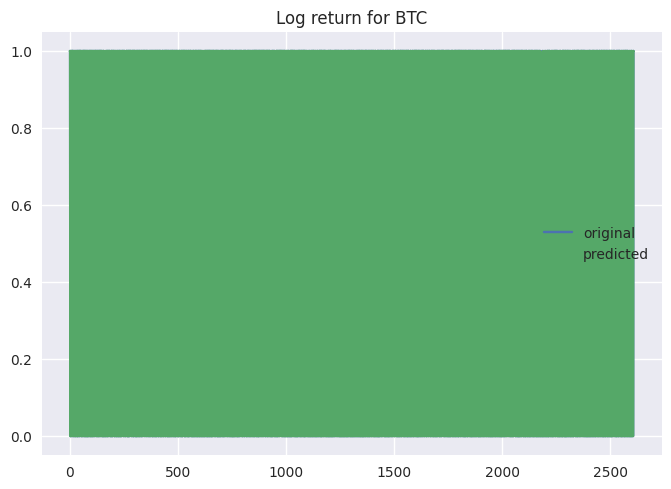

In [43]:
y = (df_final.log_return > 0).astype(int)                            #df_final.feature_label
#df_final.drop(columns=['feature_label'], axis=1)
from sklearn.metrics import accuracy_score, confusion_matrix

eval_metric = 'logloss'
eval_metric = None
xgb = XgboostForecaster(objective='binary', n_estimators=20, eta=0.3, max_depth=5, 
                    tree_method='gpu_hist', eval_metric='logloss')
xgb.create_train_test_data(X, y, test_size=0.2)
xgb.fit()
xgb.save_model(f'../dl_models/model_stack/model_price_{interval}_feature_numbers_{X.shape[1]}.json')
score = xgb.get_score()
print(f'first score: {score}')
#xgb.plot_learning_curves()
xgb.get_model_names('../dl_models/model_stack/')
#best_params = xgb.bestparams_gridcv([100, 200], [0.1], [1, 3], verbose=3)


ytest = xgb.y_test
ypred_reg = xgb.model.predict(xgb.X_test)
print(f'Last accuracy: {accuracy_score(ytest, ypred_reg)}')
print(f'Confusion Matrix: {confusion_matrix(ytest, ypred_reg)}')
x_ax = range(len(xgb.y_test))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred_reg, label="predicted")
plt.title("Log return for BTC")
plt.legend()
plt.show()
#yhat = (xgb.model.predict(xgb.X_test) > 0).astype(int)
#y_ = (xgb.y_test > 0).astype(int)
#accuracy = accuracy_score(yhat, y_)
#print('Accuracy: %.3f' % accuracy)


{'st_tema_5': 0.3881301, 'st_stoch': 0.05746015, 'candle_label': 0.038815435, 'st_adxdmi_7': 0.012588404, 'st_wma_5': 0.0113804545, 'st_tema_8': 0.011160533, 'month': 0.010831718, 'st_cut_wma_9_10': 0.010407666, 'st_cut_wma_13_14': 0.009943494, 'st_cut_wma_5_6': 0.009058314}


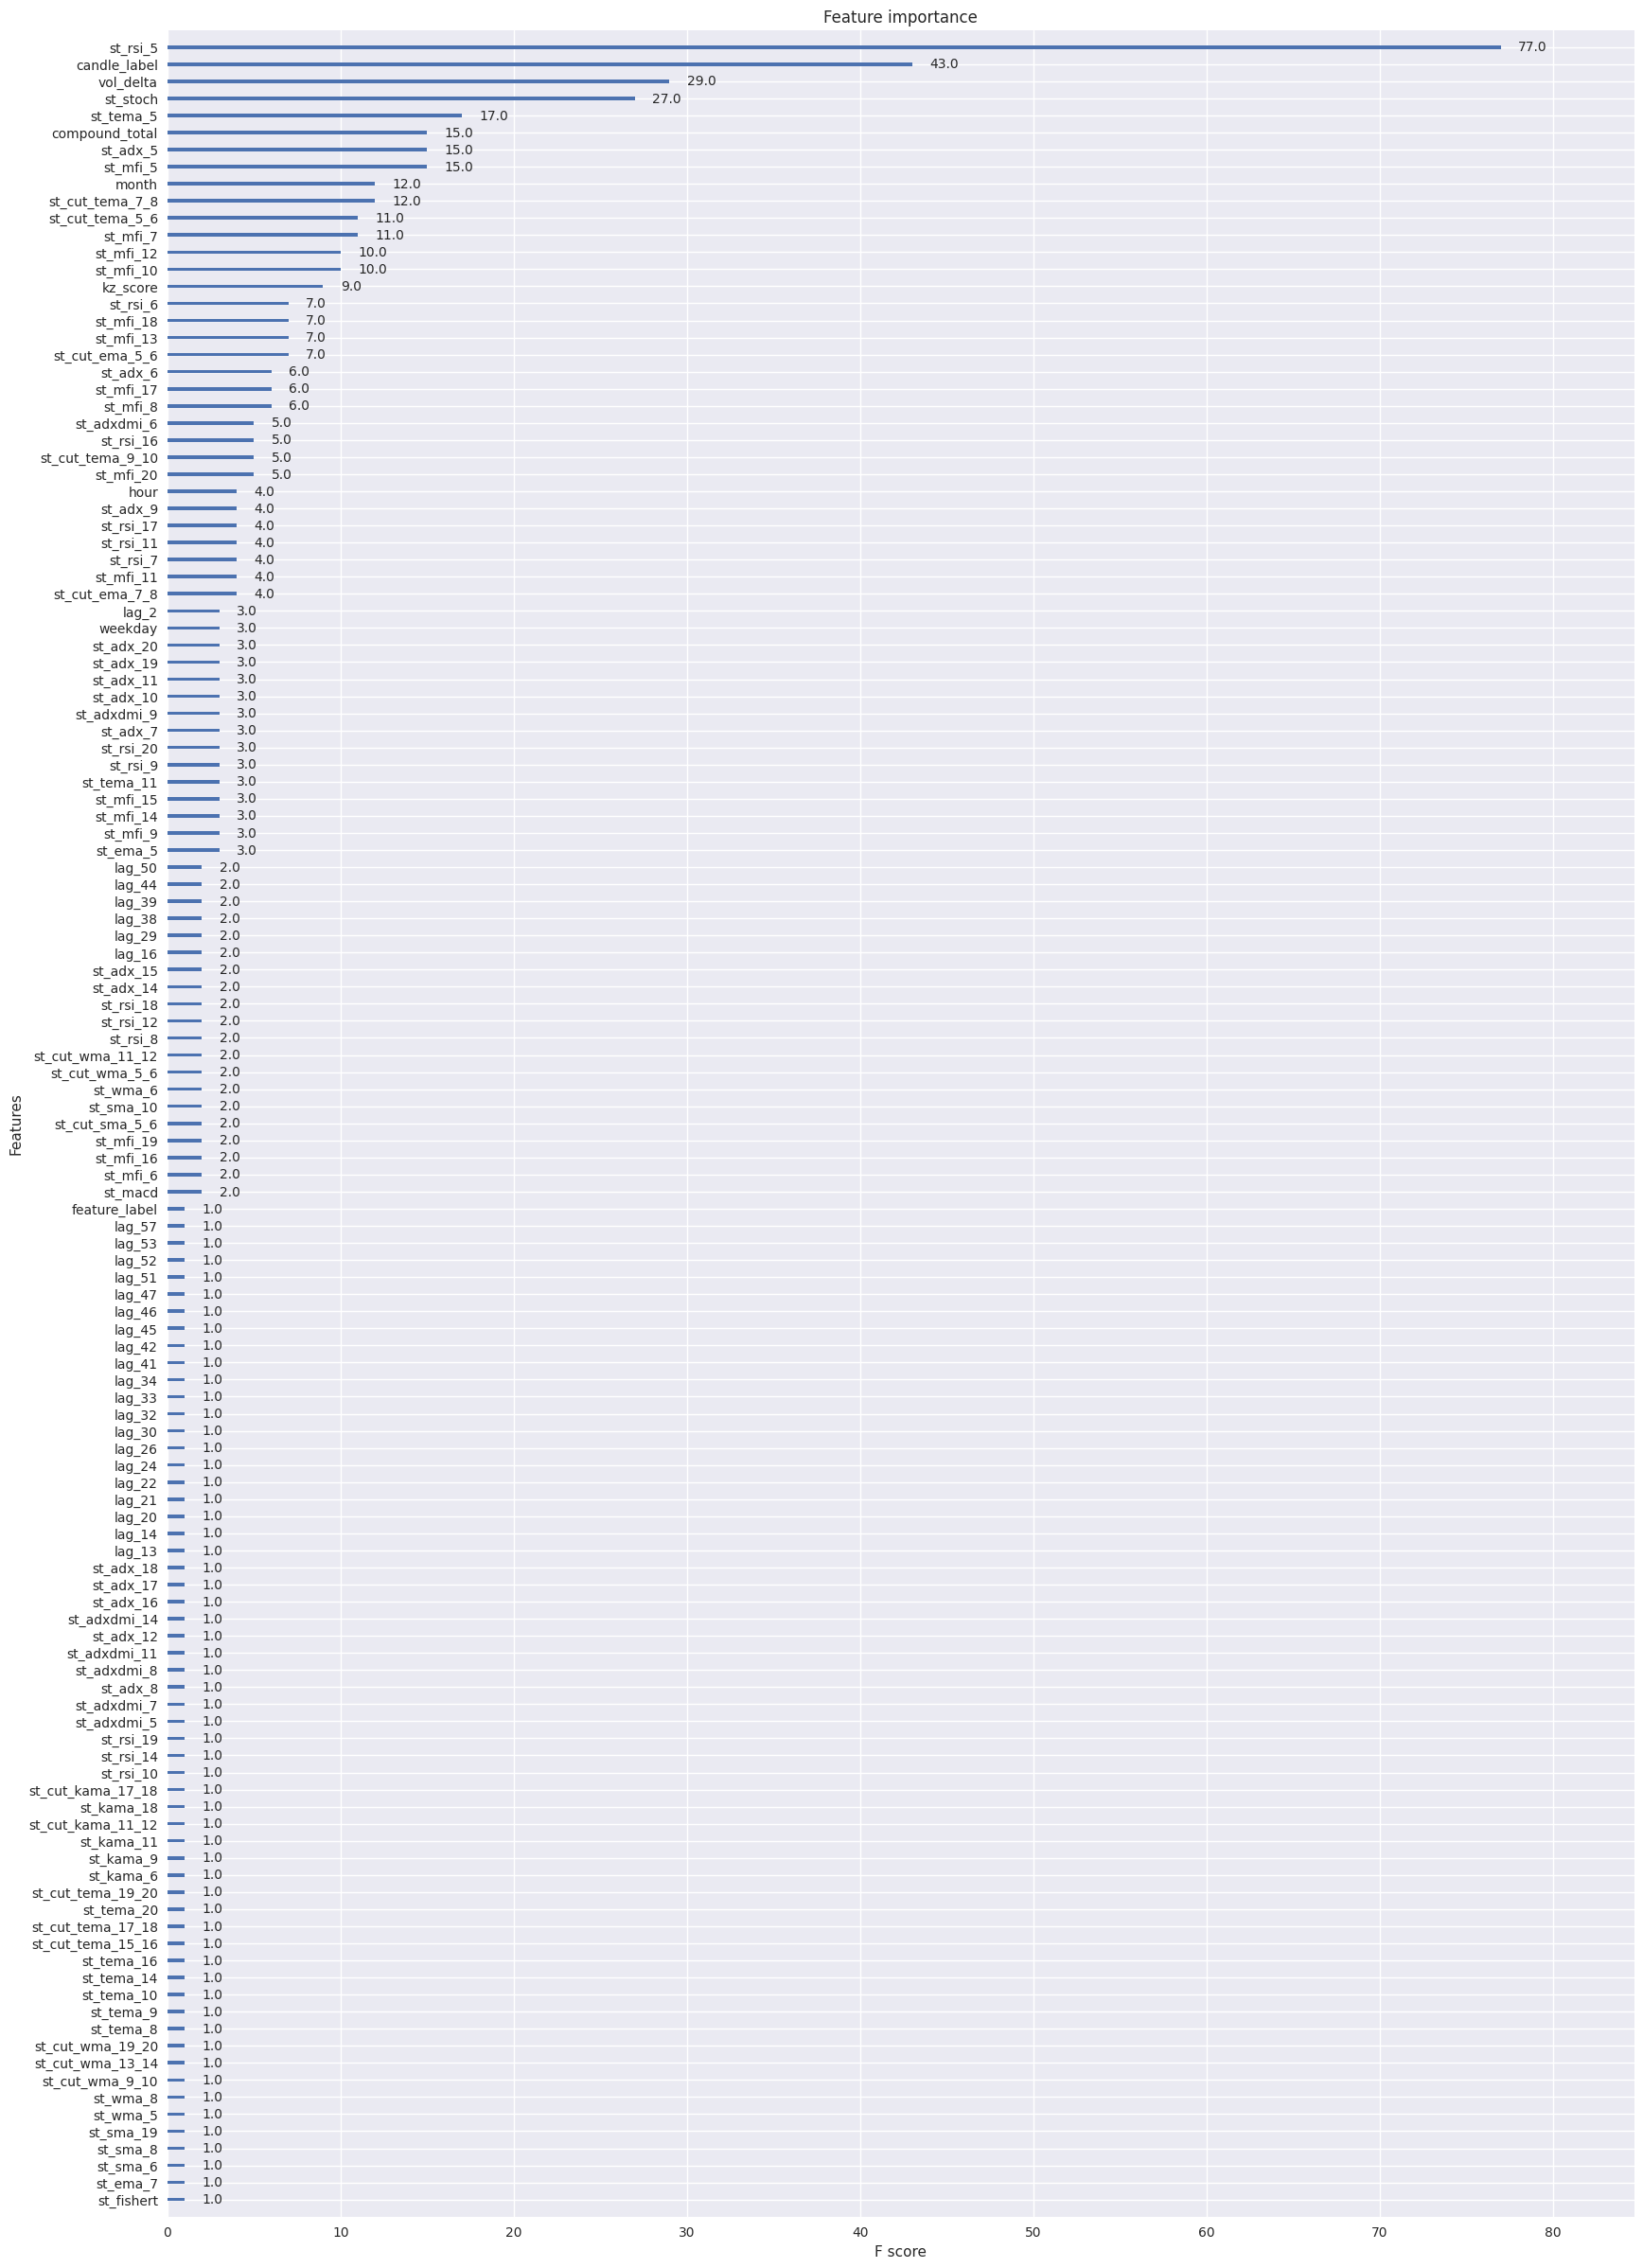

In [44]:
n_feat = xgb.get_n_importance_features(10)
print(n_feat)

xgb.plot_fature_importance()

Learning curves ploting and saved


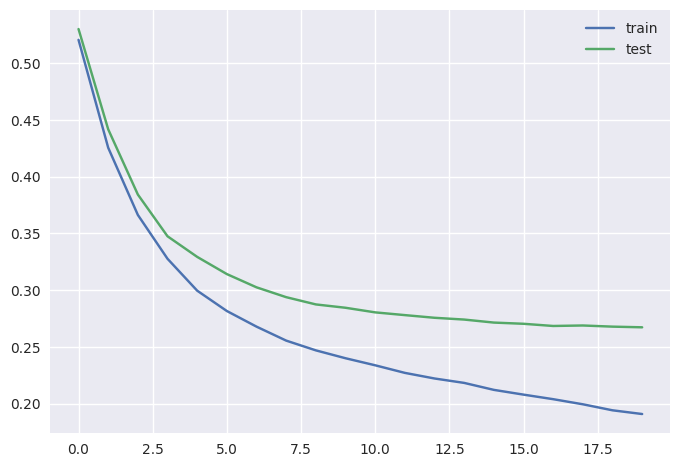

In [45]:
xgb.plot_learning_curves()